# tf.data를 이용해서 이미지 데이터셋 로드하기

In [2]:
from __future__ import absolut_import, division, print_functio, unicode_literals
import tensorflow as tf

AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

tf.__version__

SyntaxError: from __future__ imports must occur at the beginning of the file (<ipython-input-2-3737c9896796>, line 4)

# Retrieve the images

In [4]:
import tensorflow as tf
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 20s 0us/step


In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

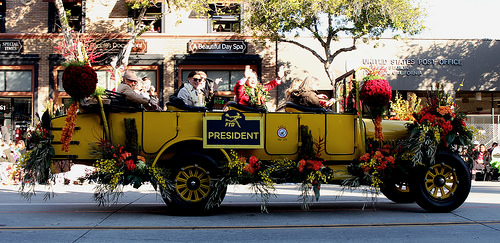

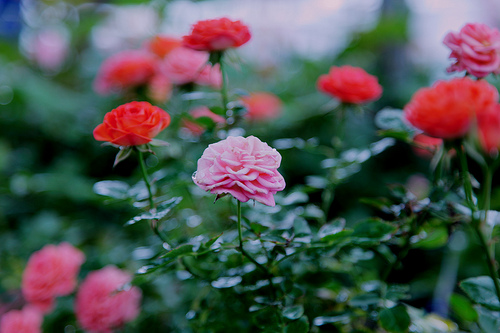

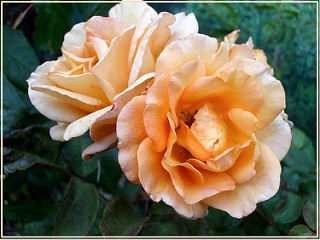

Found 3670 images belonging to 5 classes.


In [10]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

class_names = np.array([item.name for item in data_dir.glob('*')
                       if item.name != 'LICENSE.txt'])
class_names

roses = list(data_dir.glob('roses/*'))
for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))
    
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
batch_size = 32
img_height = 224
img_width = 224
steps_per_epoch = np.ceil(image_count/batch_size)

train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                    batch_size = batch_size,
                                                    shuffle=True,
                                                    target_size = (img_height, img_width),
                                                    classes = list(class_names))

In [ ]:
# inspect a batch

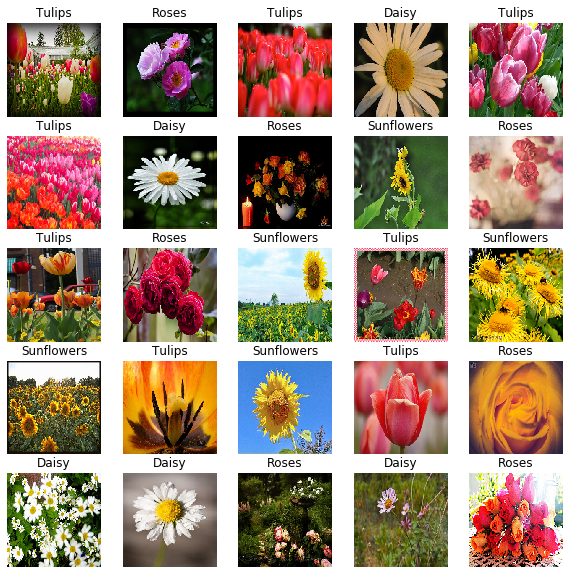

In [12]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
        ax = plt.subplot(5, 5, n+1)
        plt.imshow(image_batch[n])
        plt.title(class_names[label_batch[n]==1][0].title())
        plt.axis('off')
        
image_batch, label_batch =  next(train_data_gen)
show_batch(image_batch, label_batch)

In [13]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

for f in list_ds.take(5):
    print(f.numpy())

b'/Users/jeong-kyujin/.keras/datasets/flower_photos/roses/17305246720_1866d6303b.jpg'
b'/Users/jeong-kyujin/.keras/datasets/flower_photos/roses/16449467833_d82aac5749_m.jpg'
b'/Users/jeong-kyujin/.keras/datasets/flower_photos/roses/7187035716_5d0fb95c31_n.jpg'
b'/Users/jeong-kyujin/.keras/datasets/flower_photos/tulips/3213012716_b4c0f7db88.jpg'
b'/Users/jeong-kyujin/.keras/datasets/flower_photos/roses/5863698305_04a4277401_n.jpg'


In [14]:
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == class_names

def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    return tf.image.resize(img, [img_width, img_height])

def process_path(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

labeled_ds = list_ds.map(process_path, num_parallel_calls = AUTOTUNE)

for image, label in labeled_ds.take(1):
    print('Image shape: ', image.numpy().shape)
    print('Label: ', label.numpy())

NameError: name 'AUTOTUNE' is not defined